# Analysis of "Pokemon with stats" dataset

![TitleImg](https://images.squarespace-cdn.com/content/v1/5ac34b338f5130c1cdbe3fff/1538947836916-4FXQ8R860TK6YGIHZ739/ke17ZwdGBToddI8pDm48kMkRdEa9uq_kYwML-FZGDpsUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYwL8IeDg6_3B-BRuF4nNrNcQkVuAT7tdErd0wQFEGFSnAV9EXtqXVi7yXBWr3b7kDGEQXaRnuI_SvdBe65-u1R0WEBT9yGgelG_Z_5dUhBaTg/PK_Web+banner.jpg)

In the following a dataset comprising all Pokemon of the first 6 generations is evaluated. The dataset contains 13 columns. Each Pokemon has a unique number that corresponds to their number in the Pokedex and a Name. Most of the other columns contain the stats for each Pokemon and in addition there is information about the Types, from which Generation this Pokemon is and if it is a legendary Pokemon.

The Dataset originates from Kaggle. [Link to Kaggle dataset](https://www.kaggle.com/abcsds/pokemon).

I do not own the copyright of this picture!
[Link to Banner](https://images.squarespace-cdn.com/content/v1/5ac34b338f5130c1cdbe3fff/1538947836916-4FXQ8R860TK6YGIHZ739/ke17ZwdGBToddI8pDm48kMkRdEa9uq_kYwML-FZGDpsUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYwL8IeDg6_3B-BRuF4nNrNcQkVuAT7tdErd0wQFEGFSnAV9EXtqXVi7yXBWr3b7kDGEQXaRnuI_SvdBe65-u1R0WEBT9yGgelG_Z_5dUhBaTg/PK_Web+banner.jpg).

To use with jovian, the jovian has to be installed and imported.

In [1]:
project_name = "zerotopandas-course-project-Pokemon"

In [2]:
#!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
#jovian.commit(project = project_name)

Additionaly several libraries that are used in this notebook are imported.

In [5]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Later on a pairplot from seaborn is generated, which throws several warnings, but works anyway. The *warnings* library is imported to filter warnings.

In [6]:
import warnings
warnings.filterwarnings("ignore")

For the generation of further plots, parameters are set in the following.

In [7]:
sns.set_style('white')

In [8]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 5)

## Data Preparation and Cleaning

Beforehand I downloaded the dataset to my local drive. The dataset is now imported from the file *Pokemon.csv*.

In [9]:
Pokemon = pd.read_csv('Pokemon.csv')

Let's quickly take a look on the dataset, to get an overview of what we are dealing with, using the *head* and *shape* function.

In [10]:
Pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [11]:
Pokemon.shape

(800, 13)

First, we are replacing the whitespace in the column names by an underscore to avoid any problem when calling columns.

In [12]:
Pokemon.columns = Pokemon.columns.str.replace(' ', '_')

As we can see there is also a little problem with the Pokemon's names. If they are the *Mega*-evolution, the name contains redundancies.
So now we are correcting for this.

In [13]:
Pokemon['Name'] = Pokemon['Name'].str.replace(".*(?=Mega)", "")

Now, we are setting the name column as index to easily identify each Pokemon by its name.

In [14]:
Pokemon = Pokemon.set_index('Name')

As every Pokemon can be of one or two different Types, we generate a new column called *Type_combined* which shows  the combinations of both types.

In [15]:
Pokemon['Type_combined'] = Pokemon[['Type_1', 'Type_2']].fillna('').sum(axis=1)

In [16]:
Pokemon.head()

,#,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Type_combined
Name,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,GrassPoison
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,GrassPoison
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,GrassPoison
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False,GrassPoison
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


## Exploratory Analysis and Visualization


Firstly we want to know how many Pokemon are containg in our dataset.

In [17]:
Number_of_Pokemon = Pokemon.shape[0]
print('There are {} Pokemon in this dataset.'.format(Number_of_Pokemon))

There are 800 Pokemon in this dataset.


To calculate the basic statistics of the dataset, we are using the *describe* function.

In [18]:
Pokemon.describe()

,#,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Additionally we can plot the quickly plot all columns against each other to see potential connections and distributions using the *pairplot* function from seaborn library.

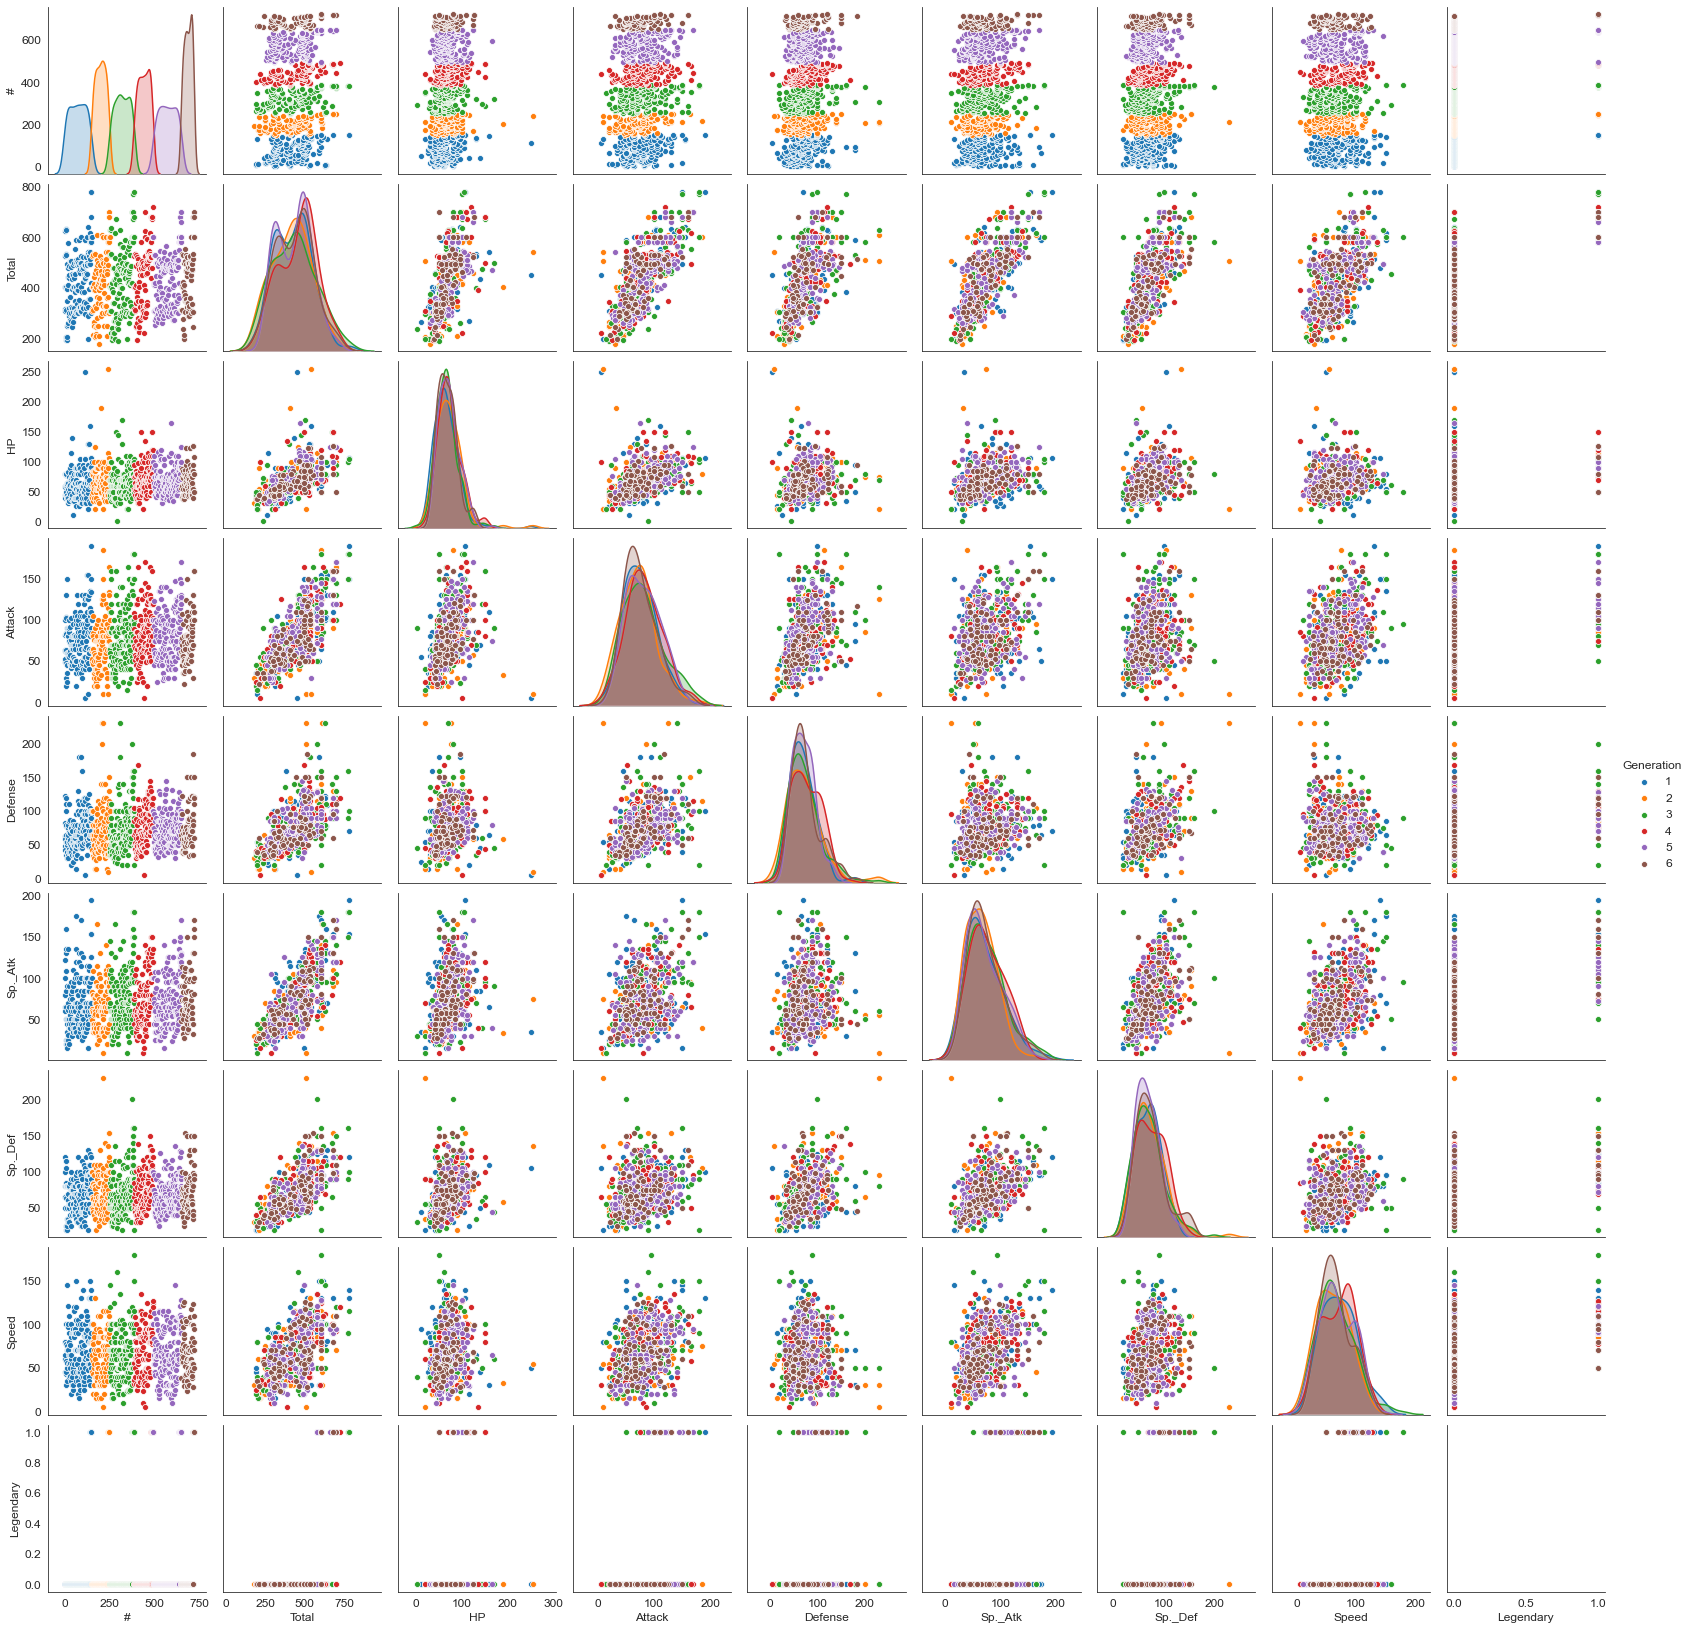

In [19]:
sns.pairplot(Pokemon, hue="Generation");

How many generations of Pokemon are contained in this dataset?

In [20]:
Pokemon['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

As categorical data does not seem to be shown in the pairplot let see which different Types and combinations our Pokemon possess.

In [21]:
Pokemon['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [22]:
Pokemon['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [23]:
Pokemon['Type_combined'].unique()

array(['GrassPoison', 'Fire', 'FireFlying', 'FireDragon', 'Water', 'Bug',
       'BugFlying', 'BugPoison', 'NormalFlying', 'Normal', 'Poison',
       'Electric', 'Ground', 'PoisonGround', 'Fairy', 'NormalFairy',
       'PoisonFlying', 'BugGrass', 'Fighting', 'WaterFighting', 'Psychic',
       'WaterPoison', 'RockGround', 'WaterPsychic', 'ElectricSteel',
       'WaterIce', 'GhostPoison', 'GrassPsychic', 'GroundRock', 'Grass',
       'PsychicFairy', 'IcePsychic', 'WaterFlying', 'WaterDark',
       'RockWater', 'RockFlying', 'IceFlying', 'ElectricFlying', 'Dragon',
       'DragonFlying', 'PsychicFighting', 'WaterElectric', 'FairyFlying',
       'PsychicFlying', 'ElectricDragon', 'WaterFairy', 'Rock',
       'GrassFlying', 'WaterGround', 'Dark', 'DarkFlying', 'Ghost',
       'NormalPsychic', 'BugSteel', 'GroundFlying', 'SteelGround',
       'BugRock', 'BugFighting', 'DarkIce', 'FireRock', 'IceGround',
       'WaterRock', 'SteelFlying', 'DarkFire', 'WaterDragon', 'RockDark',
       'Psychic

In the following, most of the analysis will focus on the *Total*-score column. Therefore we first have to test if the data in this column follow a normal distribution.

(array([ 21.,  25.,  56., 121.,  53.,  77.,  66., 134., 113.,  21.,  70.,
         10.,  18.,  10.,   5.]),
 array([180., 220., 260., 300., 340., 380., 420., 460., 500., 540., 580.,
        620., 660., 700., 740., 780.]),
 <a list of 15 Patch objects>)

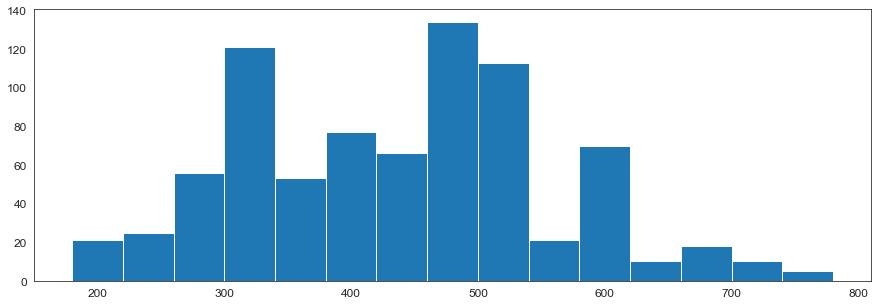

In [24]:
plt.hist(Pokemon.Total, bins=15)

In [25]:
p_thresh = 1e-3
p_norm = stats.normaltest(Pokemon.Total)[1]

In [26]:
if p_norm < p_thresh:
    print('The p-value smaller than {} and therefore the data does not correspond to a normal distribution. Be aware of that fact when selecting statistical tests.'.format(p_thresh))
else:
    print('The p-value greater than {}. The data seems to be normally distributed. Go on with your statistics.'.format(p_thresh))

The p-value smaller than 0.001 and therefore the data does not correspond to a normal distribution. Be aware of that fact when selecting statistical tests.


As the data in the total score column are not normal distributed, for testing of significant differences, ranks were generated using the *rank* function.

In [27]:
Pokemon['Rank'] = Pokemon['Total'].rank(method='first', ascending=False)

## Asking and Answering Questions

### Question 1

Which are the strongest Types of Pokemon by Type 1 and by the Type_combined column, so we are also considering Type 2 without being redundant.

In [28]:
Pokemon.groupby('Type_1').mean().sort_values(
    by='Total', ascending=False).head(10)

,#,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Rank
Type_1,,,,,,,,,,,
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,220.218750
Steel,442.851852,487.703704,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,302.370370
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,282.000000
Psychic,380.807018,475.947368,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614,333.140351
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,346.500000
Rock,392.727273,453.750000,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,361.500000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,377.387097
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,373.704545
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,393.937500


In [29]:
Pokemon.groupby('Type_combined').mean().sort_values(
    by='Total', ascending=False).head(10)

,#,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Rank
Type_combined,,,,,,,,,,,
GroundFire,383.000000,770.000000,100.000000,180.000000,160.000000,150.000000,90.000000,90.000000,3.000000,1.000000,5.000000
DragonIce,646.000000,686.666667,125.000000,140.000000,93.333333,140.000000,93.333333,95.000000,5.000000,1.000000,20.000000
SteelDragon,483.000000,680.000000,100.000000,120.000000,120.000000,150.000000,100.000000,90.000000,4.000000,1.000000,20.000000
GhostDragon,487.000000,680.000000,150.000000,110.000000,110.000000,110.000000,110.000000,90.000000,4.000000,1.000000,22.500000
DragonFire,643.000000,680.000000,100.000000,120.000000,100.000000,150.000000,120.000000,90.000000,5.000000,1.000000,24.000000
DragonElectric,644.000000,680.000000,100.000000,150.000000,120.000000,120.000000,100.000000,90.000000,5.000000,1.000000,25.000000
PsychicDark,720.000000,680.000000,80.000000,160.000000,60.000000,170.000000,130.000000,80.000000,6.000000,1.000000,28.000000
DragonPsychic,380.500000,650.000000,80.000000,100.000000,97.500000,135.000000,127.500000,110.000000,3.000000,1.000000,35.500000
RockDark,248.000000,650.000000,100.000000,149.000000,130.000000,95.000000,110.000000,66.000000,2.000000,0.000000,31.500000


### Question 2
Seeing the mean total scores of the different types raises the question if there are types that are disproportionately stronger than others. Therefore we are calculating the difference of each *Type_1*'s *rank* mean and median.

In [30]:
mean_Rank_Type_1 = Pokemon.groupby(by='Type_1').mean()['Rank']

In [31]:
mean_Rank_Type_1.sort_values(ascending=True)

Type_1
Dragon      220.218750
Flying      282.000000
Steel       302.370370
Psychic     333.140351
Fire        346.500000
Rock        361.500000
Electric    373.704545
Dark        377.387097
Ghost       393.937500
Ice         399.083333
Ground      399.562500
Water       406.169643
Grass       423.528571
Fighting    435.962963
Fairy       442.882353
Poison      468.142857
Normal      468.428571
Bug         501.217391
Name: Rank, dtype: float64

In [32]:
median_Rank_Type_1 = Pokemon.groupby(by='Type_1').median()['Rank']

In [33]:
median_Rank_Type_1.sort_values(ascending=True)

Type_1
Dragon       74.0
Flying      126.0
Steel       240.0
Psychic     305.0
Fire        319.5
Electric    327.5
Rock        337.0
Ice         357.5
Dark        366.0
Ghost       368.5
Fighting    388.0
Water       390.5
Ground      410.0
Grass       425.0
Normal      449.5
Poison      474.5
Fairy       477.0
Bug         503.0
Name: Rank, dtype: float64

In [34]:
shifted_distribution_rank = mean_Rank_Type_1 - median_Rank_Type_1

In [35]:
shifted_distribution_rank.sort_values(ascending=False)

Type_1
Flying      156.000000
Dragon      146.218750
Steel        62.370370
Fighting     47.962963
Electric     46.204545
Ice          41.583333
Psychic      28.140351
Fire         27.000000
Ghost        25.437500
Rock         24.500000
Normal       18.928571
Water        15.669643
Dark         11.387097
Grass        -1.471429
Bug          -1.782609
Poison       -6.357143
Ground      -10.437500
Fairy       -34.117647
Name: Rank, dtype: float64

Text(0.5, 1.0, 'Difference of mean and median rank brouped by Type 1')

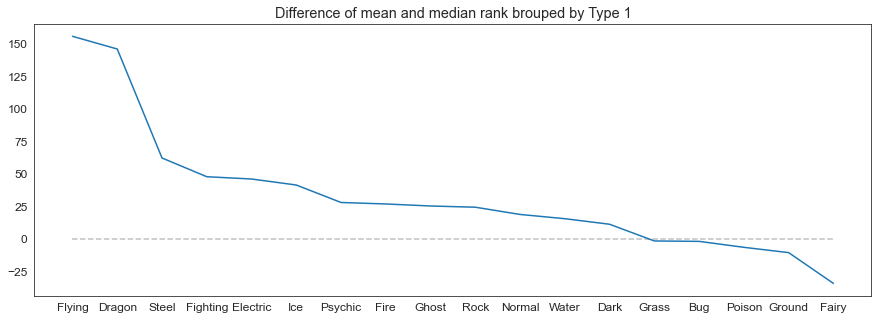

In [36]:
plt.plot(shifted_distribution_rank.sort_values(ascending=False))
plt.hlines(y=0, xmin=0, xmax=17, linestyles='dashed', alpha=0.25)
plt.title('Difference of mean and median rank brouped by Type 1')

### Question 3
This plot visualizes that picking Flying or Dragon Pokemon chances are considerably larger to get a stronger Pokemon that picking a Pokemon of type Fairy.
This raises the question, if there are significant differences in between the differen Types. Therefore we are calculating a t.test to check for significant differences.

In [37]:
Dragon = Pokemon.Rank[Pokemon.Type_1 == 'Dragon']
Flying = Pokemon.Rank[Pokemon.Type_1 == 'Flying']
Fairy = Pokemon.Rank[Pokemon.Type_1 == 'Fairy']

In [38]:
stats.ttest_ind(Dragon, Flying)

Ttest_indResult(statistic=-0.4498603834549773, pvalue=0.6556662607928483)

In [39]:
stats.ttest_ind(Dragon, Fairy)

Ttest_indResult(statistic=-3.0117268447668777, pvalue=0.004172303596368293)

### Question 4
Which are the strongest Pokemon in the game concerning their *Total*-scores. As we already know that the total scores do not follow a normal distribution, we are using the *rank* column for this analysis.

In [40]:
Pokemon.sort_values(by='Rank', ascending=True).head()

,#,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Type_combined,Rank
Name,,,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True,PsychicFighting,1.0
Mega Mewtwo Y,150,Psychic,NaN,780,106,150,70,194,120,140,1,True,Psychic,2.0
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True,DragonFlying,3.0
KyogrePrimal Kyogre,382,Water,NaN,770,100,150,90,180,160,90,3,True,Water,4.0
GroudonPrimal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True,GroundFire,5.0


Also we are plotting the Pokemons *rank* and their *Total*-score against each other, while using their *Type_1* as colorcode.

In [41]:
Rank_plot = Pokemon.sort_values(by='Rank', ascending=True)[0:100]

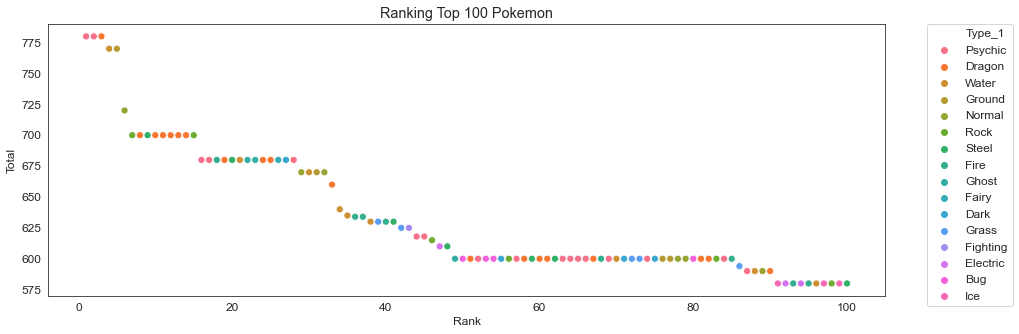

In [42]:
sns.scatterplot('Rank',
                'Total',
                hue='Type_1',
                s=50,
                alpha=1,
                data=Rank_plot)

plt.title('Ranking Top 100 Pokemon')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Question 5
How many of the Top 100 Pokemon are legendary?

In [43]:
RPLsum = Rank_plot.Legendary.sum()
print('The top 100 Pokemon contain {} legendary Pokemon.'.format(RPLsum))

The top 100 Pokemon contain 55 legendary Pokemon.


### Question 6
As there seem to be a lot of legendary Pokemons top 100 ranked Pokemon, we want to know if there is a considerable difference between legendary and non-legendary Pokemon.

In [44]:
Rank_plot_non_legend = Pokemon[Pokemon.Legendary == False].sort_values(
    by='Rank', ascending=True)[0:100]

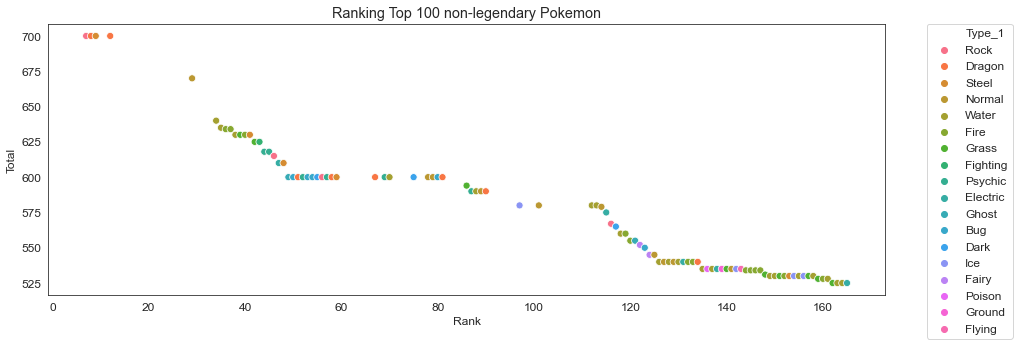

In [45]:
sns.scatterplot('Rank',
                'Total',
                hue='Type_1',
                s=50,
                alpha=1,
                data=Rank_plot_non_legend)

plt.title('Ranking Top 100 non-legendary Pokemon')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In the plot we can see considerable gaps in between the dots on *Rank*-axis. Also the scale is shifted down on the axis depicting the *Total*-score.
Now we are calculating the mean of the Total score for the top 100 and top 100 non-legendary Pokemon.

In [46]:
meanTotal = Rank_plot.Total.mean()
meanTotalNL = Rank_plot_non_legend.Total.mean()

print('The mean total score over all Top 100 Pokemon is {}, whereas the mean score of the Top 100 non-legendary Pokemon is {}.'.format(meanTotal, meanTotalNL))

The mean total score over all Top 100 Pokemon is 634.18, whereas the mean score of the Top 100 non-legendary Pokemon is 575.62.


To visualize this difference we are using the *Legendary* column for color coding the dots in our plot covering the Top 100 Pokemon.

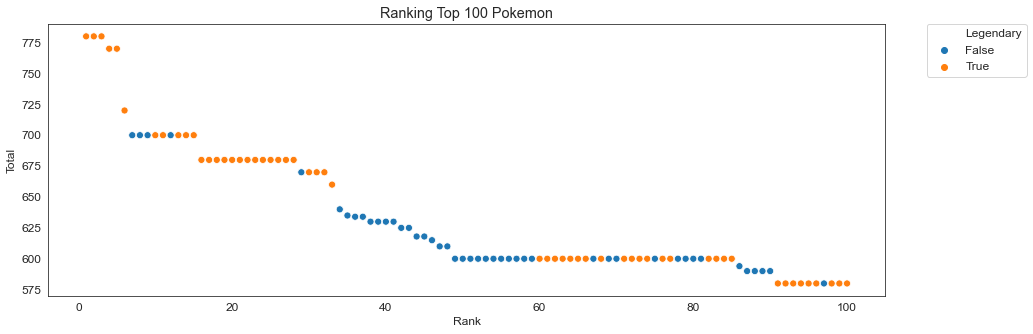

In [47]:
sns.scatterplot('Rank',
                'Total',
                hue='Legendary',
                s=50,
                alpha=1,
                data=Rank_plot)

plt.title('Ranking Top 100 Pokemon')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Question 7
Which are the strongest and weakest Pokemon? In Addition which is the strongest non-legendary Pokemon?

In [48]:
Pokemon.sort_values(by='Rank', ascending=True)[:1]

,#,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Type_combined,Rank
Name,,,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True,PsychicFighting,1.0


The strongest overall Pokemon is Mega Mewtwo X.

In [49]:
Pokemon[Pokemon.Legendary == False].sort_values(by='Rank', ascending=True)[:1]

,#,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Type_combined,Rank
Name,,,,,,,,,,,,,,
Mega Tyranitar,248,Rock,Dark,700,100,164,150,95,120,71,2,False,RockDark,7.0


The strongest non-legendary Pokemon is Mega Tyranitar.

In [50]:
Pokemon.sort_values(by='Rank', ascending=False)[:1]

,#,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Type_combined,Rank
Name,,,,,,,,,,,,,,
Sunkern,191,Grass,NaN,180,30,30,30,30,30,30,2,False,Grass,800.0


The weakest Pokemon over all 6 generations is Sunkern.

### Question 8
Which is the strongest and which the weakest generation of Pokemon?

In [51]:
Pokemon.groupby(by='Generation').mean()['Rank'].sort_values(ascending = False)

Generation
2    427.301887
1    413.259036
3    407.743750
5    403.824242
6    396.268293
4    348.272727
Name: Rank, dtype: float64

Generation 2 seems to be the strongest on average and generation 4 the weakest. Except for generation 4, all the others are pretty close together. But this is just a generalization and there will be also exceptional Pokemon in generation 4.

### Question 9
Which of the stats are impacting the *Total*-score the strongest.
To answer this question we are calculating the correlation of the different stats and plotting it as a heatmap.

In [52]:
corr = Pokemon.iloc[:,3:10].corr()
corr

,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp._Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp._Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


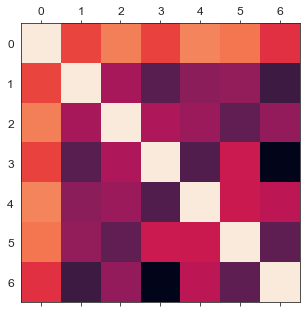

In [53]:
plt.matshow(corr);

It seems that the stats for *Attack*, *Sp.Atk* and *Sp.Def* are affecting the *Total*-score the strongest. A keene eye, will also discover that the *Total*-score is just the sum of all the other stats. To test this hypothesis we calculate, probably unnecessarily complicated, the sum and test if it is the same as *Total*.

In [54]:
Pokemon.iloc[:,3] == Pokemon.iloc[:,4] + Pokemon.iloc[:,5] + Pokemon.iloc[:,6] + Pokemon.iloc[:,7] + Pokemon.iloc[:,8] + Pokemon.iloc[:,9]

Name
Bulbasaur              True
Ivysaur                True
Venusaur               True
Mega Venusaur          True
Charmander             True
                       ... 
Diancie                True
Mega Diancie           True
HoopaHoopa Confined    True
HoopaHoopa Unbound     True
Volcanion              True
Length: 800, dtype: bool

## Inferences and Conclusion

We now know which are the strongest and weakest Pokemon in the game. Getting a legendary oder 'Mega' Pokemon will probably one of the strongest. Also we know which types are disproportionaly stronger than others. Flying and Dragon seem to be a good choice. Also, now that we know that the Total score is just the sum of all stats, but is correlating the strongest with both Atk stats and Sp.\_Def these seem to be a good indicator when selecting Pokemon. On average, generation 4 seems to be the weakest and the second generation the strongest. But except for generation 4 all the others are pretty close to each other.
There is a lot more to learn from this dataset, but that is it for now.

## References and Future Work
One could link this dataset with a table containing factors for advantages and disadvantages in between different types. Also one could link a dataset containing all possible attacks and the Pokemon that can potentially learn them to create to strongest/ all-purpose Pokemon (if possible).

To generate this Notebook the [Pandas documentation](https://pandas.pydata.org/docs/) and the [Scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) were very helpful.

In [55]:
#jovian.commit()